In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows',None)

In [3]:
df=pd.read_excel('restaurant_food_cost.xlsx')
df.head(5)

TITLE  RESTAURANT_ID  \
0      CASUAL DINING           9438   
1  CASUAL DINING,BAR          13198   
2      CASUAL DINING          10915   
3        QUICK BITES           6346   
4     DESSERT PARLOR          15387   

                                     CUISINES  \
0                 Malwani, Goan, North Indian   
1              Asian, Modern Indian, Japanese   
2  North Indian, Chinese, Biryani, Hyderabadi   
3                            Tibetan, Chinese   
4                                    Desserts   

                                     TIME     CITY        LOCALITY RATING  \
0  11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)    Thane  Dombivali East    3.6   
1                    6pm – 11pm (Mon-Sun)  Chennai       Ramapuram    4.2   
2     11am – 3:30pm, 7pm – 11pm (Mon-Sun)  Chennai      Saligramam    3.8   
3                 11:30am – 1am (Mon-Sun)   Mumbai     Bandra West    4.1   
4                    11am – 1am (Mon-Sun)   Mumbai     Lower Parel    3.8   

       VOTES  COST  
0   49 votes  1200  
1   30 votes  1500  
2  221 votes   800  
3   24 votes   800  
4  165 votes   300

In [4]:
# Making RATING column integer type
rates=list(df['RATING'])

for i in range(len(rates)):
    try:
        rates[i]=int(rates[i].split(".")[0].strip())
    except:
        pass
    

In [5]:
#rates

In [6]:
#Making VOTES column integer type
votes=list(df['VOTES'])

for i in range(len(votes)):
    try:
        votes[i]=int(votes[i].split(" ")[0].strip())
    except:
        pass

In [7]:
#votesz


In [8]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [8]:
titles=list(df['TITLE'])
cuisines=list(df['CUISINES'])
cities=list(df['CITY'])
costs=list(df['COST'])

In [9]:
d ={'RATES':rates,'VOTES':votes,'TITLES':titles,'CUISINES':cuisines,'CITY':cities,'COST':costs}

In [10]:
df1 = pd.DataFrame(d)

In [11]:
df1.shape

(12690, 6)

In [12]:
df1.isnull().sum()

RATES          2
VOTES       1204
TITLES         0
CUISINES       0
CITY         112
COST           0
dtype: int64

In [13]:
df1['VOTES'].fillna((df1['VOTES'].median()),inplace=True)

In [14]:
df1['RATES'].replace('-',np.NaN,inplace=True)

In [15]:
df1['RATES'].replace('NEW',np.NaN,inplace=True)

In [16]:
df1['RATES'].fillna((df1['RATES'].median()),inplace=True)

In [17]:
df1['CITY'].fillna((df['CITY'].mode().values[0]),inplace=True)

In [18]:
df1.isnull().sum()

RATES       0
VOTES       0
TITLES      0
CUISINES    0
CITY        0
COST        0
dtype: int64

In [19]:
#counting total no. of titles and cuisines in df

In [20]:
df1['TITLES'] = df1['TITLES'].apply(lambda x : x.split(','))

In [21]:
df1['tot_titles'] = df1['TITLES'].apply(len)

In [22]:
df1['CUISINES'] = df1['CUISINES'].apply(lambda x : x.split(', '))

In [23]:
df1['tot_cuisines'] = df1['CUISINES'].apply(len)

In [24]:
df1.shape

(12690, 8)

In [25]:
#lets check max and min of every numeric column

In [26]:
df1.head(2)

RATES  VOTES                TITLES                          CUISINES  \
0    3.0   49.0       [CASUAL DINING]     [Malwani, Goan, North Indian]   
1    4.0   30.0  [CASUAL DINING, BAR]  [Asian, Modern Indian, Japanese]   

      CITY  COST  tot_titles  tot_cuisines  
0    Thane  1200           1             3  
1  Chennai  1500           2             3

In [27]:
max(df1['RATES'])

4.0

In [28]:
min(df1['RATES'])

2.0

In [29]:
max(df1['VOTES'])

41186.0

In [30]:
min(df1['VOTES'])

4.0

In [31]:
max(df1['COST'])

14000

In [32]:
min(df1['COST'])

20

In [33]:
df1.dtypes

RATES           float64
VOTES           float64
TITLES           object
CUISINES         object
CITY             object
COST              int64
tot_titles        int64
tot_cuisines      int64
dtype: object

In [34]:
max(df1['tot_titles'])

2

In [35]:
max(df1['tot_cuisines'])

8

In [36]:
min(df1['tot_titles'])

1

In [37]:
min(df1['tot_cuisines'])

1

In [38]:
#Lets describe the data statistically
df1.describe()

RATES         VOTES          COST    tot_titles  tot_cuisines
count  12690.000000  12690.000000  12690.000000  12690.000000  12690.000000
mean       3.282900    391.696217    655.252246      1.116785      2.545942
std        0.537973    805.157717    627.003540      0.321176      1.336211
min        2.000000      4.000000     20.000000      1.000000      1.000000
25%        3.000000     64.000000    300.000000      1.000000      2.000000
50%        3.000000    163.000000    500.000000      1.000000      2.000000
75%        4.000000    405.000000    800.000000      1.000000      3.000000
max        4.000000  41186.000000  14000.000000      2.000000      8.000000

In [39]:
#Lets check the correlation.
dfcor= df1.corr()
dfcor

RATES     VOTES      COST  tot_titles  tot_cuisines
RATES         1.000000  0.319371  0.331911    0.171379      0.161495
VOTES         0.319371  1.000000  0.251294    0.156568      0.192477
COST          0.331911  0.251294  1.000000    0.215852      0.228341
tot_titles    0.171379  0.156568  0.215852    1.000000      0.181048
tot_cuisines  0.161495  0.192477  0.228341    0.181048      1.000000

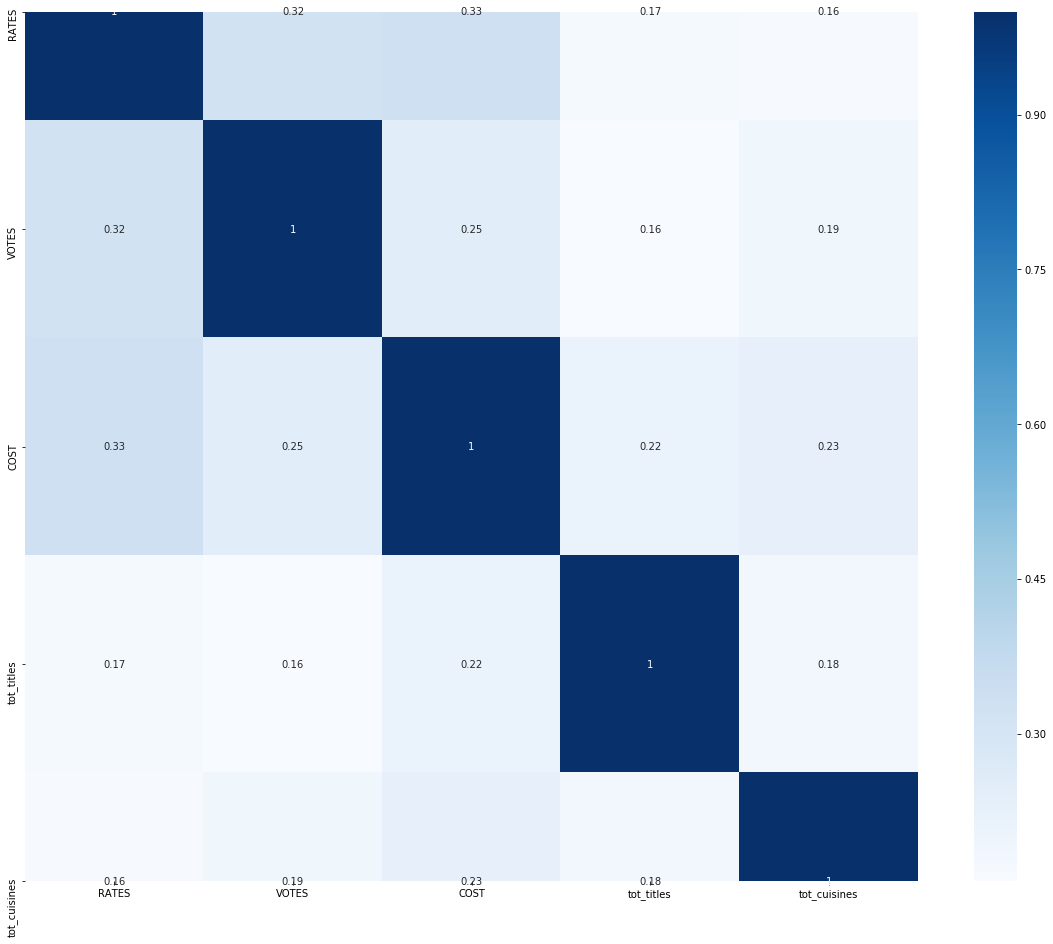

In [40]:
plt.figure(figsize = (20,16))
sns.heatmap(dfcor,cmap = 'Blues',annot = True)

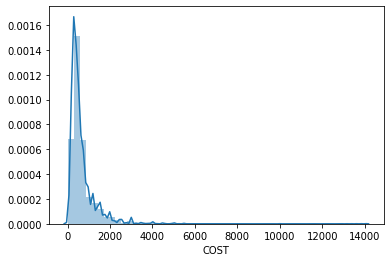

In [41]:
sns.distplot(df['COST'])

In [42]:
df1.skew()

RATES            0.094125
VOTES           14.788416
COST             3.978801
tot_titles       2.386698
tot_cuisines     0.937457
dtype: float64

In [43]:
df1['VOTES']=np.log(df1['VOTES'])

In [44]:
df1['COST']=np.log(df1['COST'])

In [45]:
df1['tot_titles']=np.log(df1['tot_titles'])

In [46]:
df1['tot_cuisines']=np.log(df1['tot_cuisines'])

In [47]:
df1.skew()

RATES           0.094125
VOTES          -0.049298
COST            0.392350
tot_titles      2.386698
tot_cuisines   -0.139012
dtype: float64

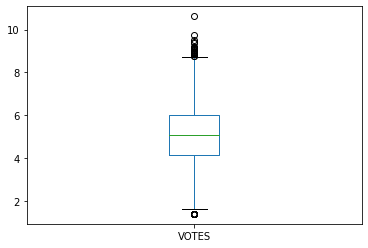

In [48]:
df1['VOTES'].plot.box()


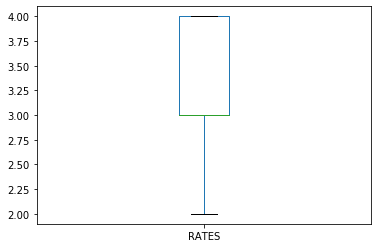

In [49]:
df1['RATES'].plot.box()

In [50]:
df1.dtypes

RATES           float64
VOTES           float64
TITLES           object
CUISINES         object
CITY             object
COST            float64
tot_titles      float64
tot_cuisines    float64
dtype: object

In [51]:
#lets first convert all categorial values into numerical values

In [52]:
le = LabelEncoder()
list1 = ['TITLES','CUISINES','CITY']
for val in list1:
    df1[val] = le.fit_transform(df1[val].astype(str))

In [53]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[0.52588318, 0.86947154, 0.75372327, ..., 1.23329902, 0.36363028,
        0.5622556 ],
       [1.33301865, 1.2297652 , 1.05600627, ..., 1.54209717, 2.75004601,
        0.5622556 ],
       [0.52588318, 0.23672551, 0.75372327, ..., 0.67219441, 0.36363028,
        1.09449646],
       ...,
       [1.33301865, 0.9799064 , 0.33449556, ..., 1.34406646, 0.36363028,
        1.09449646],
       [0.52588318, 1.18237071, 0.75372327, ..., 0.28702026, 0.36363028,
        1.09449646],
       [0.52588318, 1.05884741, 0.75372327, ..., 0.27408435, 0.36363028,
        0.18789575]])

In [54]:
threshold=3
print(np.where(z>3))

(array([  196,   235,   337,   563,   839,  1185,  1281,  1422,  1470,
        1475,  1916,  1931,  2488,  2531,  2610,  2689,  2740,  2940,
        3197,  3211,  3551,  3554,  3730,  3962,  4558,  4578,  4728,
        4931,  5108,  5502,  5944,  5975,  6154,  6475,  6505,  6519,
        6690,  6804,  7165,  7262,  7784,  7883,  7988,  8078,  8106,
        8143,  8907,  9088,  9132,  9578,  9609,  9830, 10546, 10914,
       11129, 11521, 11785, 11972, 12271, 12352], dtype=int64), array([1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 1, 5, 5, 5, 1, 5, 5, 5, 5, 5, 1, 1, 5, 5, 1, 5, 5, 1, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int64))


In [55]:
df_new=df1[((z<3).all(axis=1))] #Removing the outliers
df_new.head(5)

RATES     VOTES  TITLES  CUISINES  CITY      COST  tot_titles  tot_cuisines
0    3.0  3.891820      42      2626   320  7.090077    0.000000      1.098612
1    4.0  3.401197      32       287    67  7.313220    0.693147      1.098612
2    3.0  5.398163      42      2973    67  6.684612    0.000000      1.386294
3    4.0  3.178054     105      4134   222  6.684612    0.000000      0.693147
4    3.0  5.105945      58      1818   222  5.703782    0.000000      0.000000

In [56]:
df1.shape

(12690, 8)

In [57]:
df_new.shape

(12630, 8)

In [58]:
df_new.drop(['TITLES','CUISINES'], axis=1,inplace=True)

In [59]:
df_new

RATES     VOTES  CITY      COST  tot_titles  tot_cuisines
0        3.0  3.891820   320  7.090077    0.000000      1.098612
1        4.0  3.401197    67  7.313220    0.693147      1.098612
2        3.0  5.398163    67  6.684612    0.000000      1.386294
3        4.0  3.178054   222  6.684612    0.000000      0.693147
4        3.0  5.105945   222  5.703782    0.000000      0.000000
5        4.0  6.309918   222  6.684612    0.000000      1.386294
6        4.0  6.232448    37  6.396930    0.000000      1.609438
7        4.0  7.385231   119  7.377759    0.000000      0.000000
8        3.0  4.615121    37  5.703782    0.000000      0.693147
9        3.0  5.389072   131  5.298317    0.000000      0.000000
10       4.0  5.497168    37  6.802395    0.000000      1.386294
11       4.0  5.613128    37  6.684612    0.693147      1.098612
12       3.0  2.708050   173  6.396930    0.000000      0.693147
13       3.0  5.093750   173  5.991465    0.000000      0.000000
14       4.0  5.075174   323  5.703782    0.000000      0.000000
15       4.0  7.823646   131  7.244228    0.693147      0.693147
16       3.0  5.765191   222  6.802395    0.000000      0.693147
17       3.0  4.795791   131  6.396930    0.000000      1.098612
18       3.0  6.282267    14  6.396930    0.000000      0.693147
19       4.0  5.857933   252  5.298317    0.693147      1.098612
20       4.0  5.991465   131  5.857933    0.000000      0.693147
21       4.0  7.190676   252  6.214608    0.000000      1.098612
22       4.0  7.082549   252  6.109248    0.000000      1.386294
23       3.0  6.278521    37  6.396930    0.000000      1.386294
24       4.0  6.200509   252  6.551080    0.000000      1.098612
25       3.0  5.918894   173  5.991465    0.000000      0.693147
26       3.0  4.653960    37  6.551080    0.000000      1.098612
27       4.0  5.181784    67  7.244228    0.693147      0.000000
28       4.0  5.010635    67  6.907755    0.000000      1.386294
29       4.0  7.806289    37  7.244228    0.000000      1.386294
30       3.0  3.637586    67  5.298317    0.000000      0.693147
31       4.0  6.302619   119  6.214608    0.000000      0.693147
32       4.0  7.708860    16  7.090077    0.000000      1.609438
33       4.0  5.521461   173  5.703782    0.000000      1.098612
34       2.0  4.882802    67  6.214608    0.000000      1.098612
35       3.0  1.945910    37  6.214608    0.000000      1.609438
36       3.0  3.713572    67  5.991465    0.000000      0.693147
37       4.0  4.234107    37  6.684612    0.000000      0.693147
38       4.0  5.700444    67  6.907755    0.000000      0.000000
39       3.0  2.708050    37  5.521461    0.000000      0.693147
40       3.0  4.219508   131  5.298317    0.000000      1.098612
41       3.0  3.784190    37  5.703782    0.000000      0.693147
42       3.0  3.828641   173  5.521461    0.000000      0.000000
43       4.0  4.787492   131  5.991465    0.000000      0.693147
44       4.0  5.666427    37  5.991465    0.000000      1.098612
45       4.0  5.572154   119  6.684612    0.000000      1.098612
46       4.0  6.093570   131  7.600902    0.000000      1.609438
47       3.0  6.892642   207  7.244228    0.693147      1.386294
48       4.0  7.508787    37  7.090077    0.000000      1.098612
49       4.0  6.249975    37  5.991465    0.000000      0.693147
50       3.0  2.484907   173  5.991465    0.000000      1.098612
51       4.0  5.463832    37  6.551080    0.000000      0.693147
52       3.0  6.605298    16  6.551080    0.000000      1.386294
53       3.0  3.526361    37  5.857933    0.000000      0.693147
54       3.0  4.189655    37  5.991465    0.000000      1.386294
55       3.0  3.433987   173  5.991465    0.693147      0.000000
56       3.0  2.995732   252  5.991465    0.000000      0.693147
57       3.0  5.389072   131  5.703782    0.000000      0.693147
58       4.0  4.976734     7  5.991465    0.000000      0.000000
59       3.0  5.278115    67  6.684612    0.000000      1.386294
60       3.0  2.890372    36  6.396930    

In [60]:
x =df_new[['RATES','VOTES','tot_titles','tot_cuisines','CITY']]

In [61]:
x.shape

(12630, 5)

In [62]:
 y = df_new[['COST']]

In [63]:
y.shape

(12630, 1)

In [64]:
#Scaling the input variable
#Algorithm requires all features to be on common scale

In [65]:

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

x = scale.fit_transform(x)

In [66]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

max_r_score = 0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size = 0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state
print('max r2 score corresponding to',final_r_state,'is',max_r_score)

max r2 score corresponding to 67 is 0.31218126811521985


In [67]:
x_train.shape

(10104, 5)

In [68]:

from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring ='r2').mean()

0.2733855551323019

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 81,test_size=0.20)
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
pred = lreg.predict(x_test)

In [70]:
lreg.score(x_train,y_train)

0.27376674574172644

In [71]:
print('error')
print('Mean squared:', mean_absolute_error(y_test,pred))
print('Mean Squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print('r2 score:',r2_score(y_test,pred))

error
Mean squared: 0.4636724741128719
Mean Squared error: 0.3585906275954399
Root Mean Squared Error: 0.5988243712437228
r2 score: 0.2790263695079235


In [72]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

max_r_score = 0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size = 0.20)
    regr = RandomForestRegressor()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state
print('max r2 score corresponding to',final_r_state,'is',max_r_score)

max r2 score corresponding to 56 is 0.18191167831787425


In [74]:
x_train.shape

(10104, 5)

In [76]:
y_train.shape

(10104, 1)

In [77]:
x_test.shape

(2526, 5)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse','mae']
}

gd_sr = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    scoring='r2',cv=5)
gd_sr.fit(x_train,y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV 
rf = RandomForestRegressor()
param_dist = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse','mae']
}
 
gd_sr =RandomizedSearchCV(estimator=rf, param_distributions=param_dist, scoring='r2', cv=5)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'n_estimators': 200, 'max_features': 'log2', 'max_depth': 8, 'criterion': 'mse'}
0.32282719173318647


In [ ]:
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist = {"max_depth": [3, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 
  
# Instantiating Decision Tree classifier 
tree = DecisionTreeClassifier() 
  
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5) 
  
tree_cv.fit(X, y) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_))

In [94]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators = 200, random_state = 56)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.7894079831152355

In [97]:
from sklearn.model_selection import cross_val_score

score= cross_val_score(rf,x,y,cv=10,scoring='r2')
print(score)
print(score.mean())
print(score.std())

[0.15357226 0.1577817  0.17464813 0.18257461 0.18348856 0.19399162
 0.15323308 0.18372432 0.20177587 0.17986551]
0.17646556561920143
0.01585845995627299


In [96]:
from sklearn.ensemble import GradientBoostingRegressor
gd = GradientBoostingRegressor()
gd.fit(x_train,y_train)
gd.score(x_test,y_test)

0.31760985400023956

In [73]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
ada.score(x_train,y_train)

0.2548012680148437

In [74]:
model = [LinearRegression(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor()]

In [75]:
for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    print('score',score)

score 0.2660209131581637
score 0.7546894044227279
score 0.3393710031505185
score 0.26115514756658


In [78]:
from sklearn.externals import joblib
joblib.dump(rf,'rfresfoodcost.obj')
rf_from_joblib = joblib.load('rfresfoodcost.obj')
rf_from_joblib.predict(x_test)

array([6.14010706, 4.94373787, 5.63014499, ..., 5.12323022, 6.52494312,
       6.24789705])